In [1]:
import sys

def is_running_in_colab():
  return 'google.colab' in sys.modules

In [2]:
%pip install --upgrade pip
%pip install wandb
%pip install randomname
%pip install colorama
%pip install --upgrade torch
%pip install flash-attn --no-build-isolation
%pip install --upgrade datasets
%pip install --upgrade accelerate
%pip install --upgrade peft
%pip install --upgrade transformers
%pip install --upgrade huggingface_hub[hf_transfer]
%pip install gymnasium
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for randomname: filename=randomname-0.2.1-py3-none-any.whl size=89195 sha256=e659b5471579ccffe049518892906565b072bd89bcbf8ddda2dc6d48dad5a761
  Stored in directory: /root/.cache/pip/wheels/99/b3/ae/c137ed34d7c385b74ae440b4f008183264ebe466ea0341db09
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=940f117da8396bec72d34ee07d390a761f1e531e81e0b821a6e654e8c248a418
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built randomname fire
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 109.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fla

In [3]:
import randomname

name = randomname.get_name()
notes = ""

In [4]:
from huggingface_hub import login
import os

if is_running_in_colab():
    from google.colab import userdata
    hf_token = userdata.get('HF_TOKEN')
else:
    hf_token = os.environ['HF_TOKEN']
login(token=hf_token)

In [5]:
import wandb
import os

if is_running_in_colab():
    from google.colab import userdata
    wandb_token = userdata.get('WANDB_TOKEN')
else:
    wandb_token = os.environ['WANDB_TOKEN']
wandb.login(key=wandb_token)
wandb.init(project="FrozenLakeEval", name=name, notes=notes, save_code=False)

wandb: Currently logged in as: mrentschler (mrentschler-self). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


1


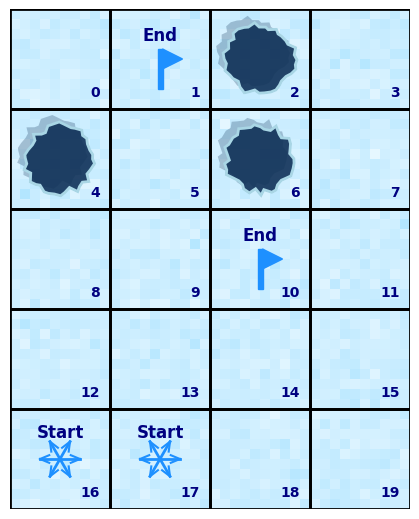


2


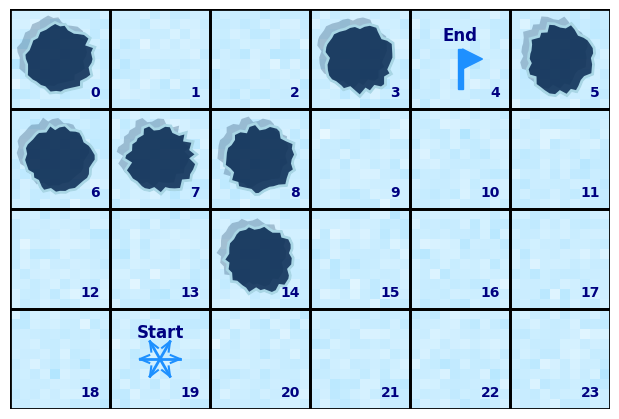


3


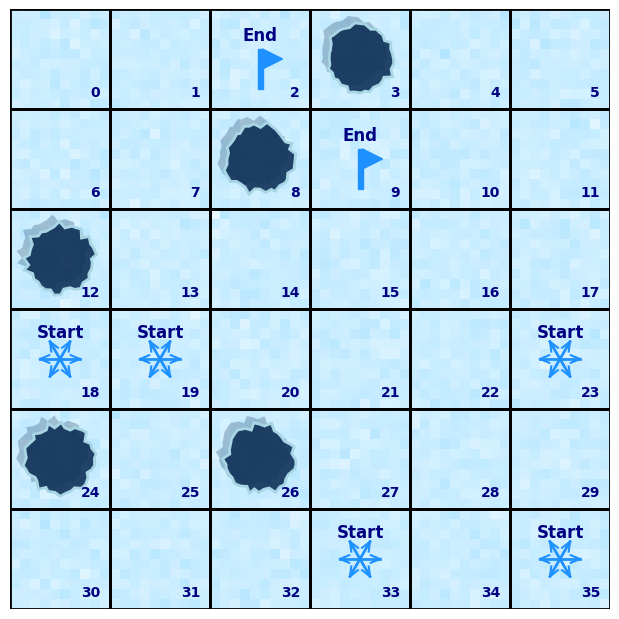


Mutated


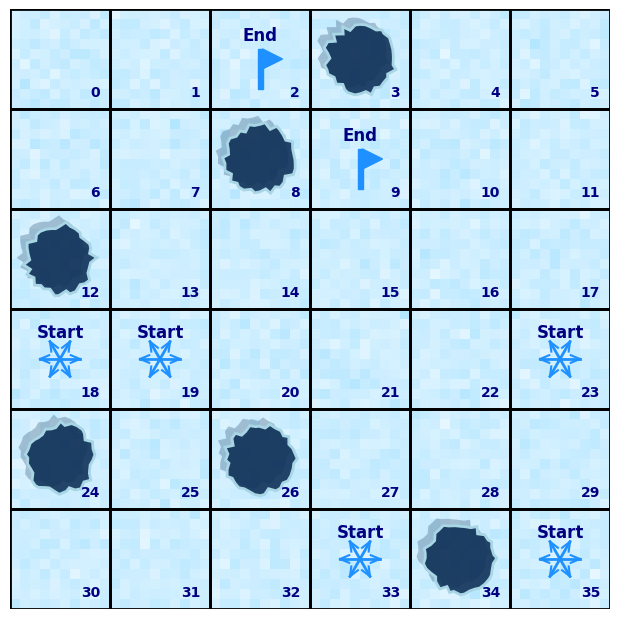

In [6]:
import random
from colorama import Fore, Style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import matplotlib.patches as patches
from matplotlib.patches import PathPatch, Shadow
from matplotlib.path import Path
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

def draw_map(tile_map, trajectories_observations=None, alpha=1.0, color="purple"):
    if trajectories_observations is None:
        trajectories_observations = []

    n_rows = len(tile_map)
    n_cols = len(tile_map[0])

    def obs_to_xy(observation):
        row = observation // n_cols
        col = observation % n_cols
        return row, col

    # Keep track of goal, hole, and start positions
    goal_positions = []
    hole_positions = []
    start_positions = []

    for i in range(n_rows):
        for j in range(n_cols):
            tile = tile_map[i][j]
            if tile == 'G':
                goal_positions.append((i, j))
            elif tile == 'H':
                hole_positions.append((i, j))
            elif tile == 'S':
                start_positions.append((i, j))

    # Plot the map
    scale = 1.0
    fig, ax = plt.subplots()
    fig.set_size_inches(n_cols * scale, n_rows * scale)
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(-0.5, n_rows - 0.5)
    ax.invert_yaxis()
    ax.set_aspect('equal')

    # Draw the ice surface with subtle texture
    x = np.linspace(0, n_cols, n_cols * 10)
    y = np.linspace(0, n_rows, n_rows * 10)
    X, Y = np.meshgrid(x, y)
    Z = np.random.normal(loc=0.5, scale=0.02, size=X.shape)

    # Create a custom colormap for the ice texture with more icy blues
    ice_colors = ['#e6f7ff', '#cceeff', '#b3e6ff']  # Light icy blues
    ice_cmap = LinearSegmentedColormap.from_list('ice_cmap', ice_colors)

    ax.imshow(
        Z,
        extent=[-0.5, n_cols - 0.5, -0.5, n_rows - 0.5],
        origin='upper',
        cmap=ice_cmap,
        zorder=0
    )

    # Draw borders around each tile using rectangles
    line_width = 2  # Thickness of the border lines
    for i in range(n_rows):
        for j in range(n_cols):
            rect = patches.Rectangle(
                (j - 0.5, i - 0.5),  # Lower-left corner of the rectangle
                1,                   # Width of the rectangle
                1,                   # Height of the rectangle
                linewidth=line_width,
                edgecolor='black',  # Changed to light gray for a softer look
                facecolor='none',
                zorder=1
            )
            ax.add_patch(rect)

    # Remove gridlines and ticks because we're drawing borders manually
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Annotate tiles with state indices
    state_index = 0
    for i in range(n_rows):
        for j in range(n_cols):
            tile_label = f"{state_index}"
            # Adjust position to bottom right corner
            text_x = j
            text_y = i
            ax.text(
                text_x + 0.4,
                text_y + 0.4,
                tile_label,
                ha='right',
                va='bottom',
                color='navy',  # Changed to navy for a wintery tone
                fontsize=10 * scale,
                zorder=5,
                fontweight='bold',
            )
            state_index += 1

    # Overlay trajectories
    for observations in trajectories_observations:
        # Map observations to positions
        positions = [obs_to_xy(obs) for obs in observations]
        # Separate rows and columns
        rows, cols = zip(*positions)
        # Adjust positions for plotting with slight random jitter for visibility
        jitter = 0.2
        rows = np.array(rows) + np.random.uniform(-jitter, jitter, size=len(rows))
        cols = np.array(cols) + np.random.uniform(-jitter, jitter, size=len(cols))

        for i in range(len(rows) - 1):
            ax.annotate(
                "",
                xy=(cols[i + 1], rows[i + 1]),
                xytext=(cols[i], rows[i]),
                arrowprops=dict(arrowstyle="->", linewidth=1.5, color=color, alpha=alpha),
                zorder=10
            )

    # Function to draw a flag at a given position
    def draw_flag(ax, position, color='#1E90FF', label=''):
        row, col = position

        # Adjusted positions to move the flag down
        base_x = col
        base_y = row + 0.3  # Moved down within the tile

        # Pole dimensions
        pole_height = 0.4  # Shortened the pole
        pole_width = 0.05

        # Draw the pole with the same color as the flag
        pole = patches.Rectangle(
            (base_x - pole_width / 2, base_y - pole_height),
            pole_width,
            pole_height,
            linewidth=1,
            edgecolor=color,
            facecolor=color,
            zorder=5
        )
        ax.add_patch(pole)

        # Draw the flag
        flag_height = 0.2
        flag_width = 0.2

        # Coordinates of the flag triangle
        flag_x = base_x + pole_width / 2
        flag_y = base_y - pole_height

        flag_vertices = [
            (flag_x, flag_y),  # Top of the pole
            (flag_x + flag_width, flag_y + flag_height / 2),  # Far corner of the flag
            (flag_x, flag_y + flag_height)  # Bottom of the flag
        ]

        flag = patches.Polygon(
            flag_vertices,
            closed=True,
            linewidth=1,
            edgecolor=color,
            facecolor=color,
            zorder=6
        )
        ax.add_patch(flag)

        # Draw the label above the flag
        if label:
            ax.text(
                base_x,                      # Centered horizontally on the tile
                flag_y - 0.05,               # Slightly above the flag
                label,
                ha='center',
                va='bottom',
                color='navy',
                fontsize=12 * scale,
                fontweight='bold',
                zorder=7
            )

    # Function to draw a snowflake symbol at the start position
    def draw_snowflake(ax, position, color='white', label=''):
        row, col = position
        center_x = col
        center_y = row
        num_branches = 6  # Number of branches in the snowflake
        arm_length = 0.2 * scale  # Length of each branch

        # Angles for the branches
        angles = np.linspace(0, 2 * np.pi, num_branches, endpoint=False)

        # Draw each branch
        for angle in angles:
            x_start = center_x
            y_start = center_y
            x_end = center_x + arm_length * np.cos(angle)
            y_end = center_y + arm_length * np.sin(angle)
            ax.plot([x_start, x_end], [y_start, y_end], color=color, linewidth=2 * scale, zorder=8)

            # Add smaller branches at the end of each main branch
            branch_angle = np.pi / 8  # Angle between the main branch and the side branches
            side_arm_length = arm_length * 0.5  # Length of the side branches

            # First side branch
            side_angle1 = angle + branch_angle
            x_side1 = x_end - side_arm_length * np.cos(side_angle1)
            y_side1 = y_end - side_arm_length * np.sin(side_angle1)
            ax.plot([x_end, x_side1], [y_end, y_side1], color=color, linewidth=1.5 * scale, zorder=8)

            # Second side branch
            side_angle2 = angle - branch_angle
            x_side2 = x_end - side_arm_length * np.cos(side_angle2)
            y_side2 = y_end - side_arm_length * np.sin(side_angle2)
            ax.plot([x_end, x_side2], [y_end, y_side2], color=color, linewidth=1.5 * scale, zorder=8)

        # Optionally, add a label above the snowflake
        ax.text(
            col,                      # Centered horizontally
            row - 0.18,               # Positioned above the snowflake
            label,
            ha='center',
            va='bottom',
            color='navy',             # Changed to navy for contrast
            fontsize=12 * scale,
            fontweight='bold',
            zorder=9
        )

    # Function to draw an irregular hole with adjustable jaggedness
    def draw_irregular_hole(ax, hole_center, jaggedness=1.0):
        # Generate points around a circle with increased noise and varying angles to create a more jagged shape
        num_points = 40  # Number of points defining the hole's perimeter
        angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

        # Adjust the angle noise based on jaggedness parameter
        angle_noise = jaggedness * (np.pi / num_points)
        angles += np.random.uniform(-angle_noise, angle_noise, size=num_points)  # Randomize angles

        # Adjust the radius noise based on jaggedness parameter
        radius_noise = jaggedness * 0.15
        radius = 0.3 + radius_noise * np.random.rand(num_points)  # Random radius components

        x = hole_center[0] + radius * np.cos(angles)
        y = hole_center[1] + radius * np.sin(angles)

        # Close the loop by appending the first point at the end
        x = np.append(x, x[0])
        y = np.append(y, y[0])

        # Create a Path for the irregular hole
        vertices = np.column_stack((x, y))
        codes = [Path.MOVETO] + [Path.LINETO] * (len(vertices) - 2) + [Path.CLOSEPOLY]
        path = Path(vertices, codes)

        # Draw the hole (deep water)
        hole_patch = PathPatch(
            path,
            facecolor='#0f3057',  # Darker blue for deep water
            edgecolor='#00587a',  # Dark teal for edge
            linewidth=1,
            alpha=0.9,
            zorder=3
        )
        ax.add_patch(hole_patch)

        # Draw a lighter edge around the hole to simulate the ice edge
        ice_edge = PathPatch(
            path,
            facecolor='none',
            edgecolor='#a9d6e5',  # Light icy blue for ice edge
            linewidth=2,
            zorder=4
        )
        ax.add_patch(ice_edge)

        # Add a shadow to give depth
        shadow = Shadow(
            ice_edge,
            -0.05, -0.05,
            alpha=0.3,
            facecolor='#27496d',  # Dark blue for shadow
            edgecolor='none',
            zorder=2
        )
        ax.add_patch(shadow)

    # Draw flags at goal positions (changed to blue flags for a wintery theme)
    for position in goal_positions:
        draw_flag(ax, position, color='#1E90FF', label='End')  # Using Dodger Blue

    # Draw snowflake symbols at start positions (white snowflakes)
    for position in start_positions:
        draw_snowflake(ax, position, color='#1E90FF', label='Start')

    # Draw holes on 'H' tiles with adjustable jaggedness
    for hole_row, hole_col in hole_positions:
        # Position of the hole (adjusted for plotting)
        hole_center = (hole_col, hole_row)
        # Draw the irregular hole with adjustable jaggedness
        draw_irregular_hole(ax, hole_center, jaggedness=0.5)

    # Adjust the axis limits and invert y-axis for correct orientation
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(-0.5, n_rows - 0.5)
    ax.invert_yaxis()
    ax.set_aspect('equal')

    # Remove axis spines and ticks
    ax.set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)

    # Show the plot
    plt.show()

    # Draw the canvas and get RGBA buffer from the figure
    fig.canvas.draw()
    image_data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image_data = image_data.reshape(fig.canvas.get_width_height()[::-1] + (4,))

    plt.close(fig)

    return image_data

def map_is_valid(map, min_hops):
    board = []
    for row in map:
        board.append(list(row))

    frontier = []
    goal_reachable = False
    for r, row in enumerate(board):
        for c, col in enumerate(row):
            if col == "S":
                pos = (r, c)
                goal_reachable = can_reach_goal(pos, board, min_hops)
                if not goal_reachable:
                    return False

    return goal_reachable

def can_reach_goal(pos, board, min_hops):
    frontier = []
    frontier.append((pos[0], pos[1], 0))

    discovered = set()

    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

    while frontier:
        r, c, h = frontier.pop(0)
        if not (r, c) in discovered:
            discovered.add((r, c))
            for x, y in directions:
                r_new = r + x
                c_new = c + y
                if r_new < 0 or r_new >= len(board) or c_new < 0 or c_new >= len(board[0]):
                    continue
                if board[r_new][c_new] == "G":
                    if h+1 >= min_hops:
                        return True
                    else:
                        return False
                if board[r_new][c_new] != "H":
                    frontier.append((r_new, c_new, h+1))
    return False


def generate_map(min_width=4, max_width=4, min_height=4, max_height=4, hole_prob=0.7, start_pos=0, start_pos_prob=None, goal_pos=15, goal_pos_prob=None, seed=None):
    if seed is not None:
        random.seed(seed)

    width = random.randint(min_width, max_width)
    height = random.randint(min_height, max_height)

    map_index = ['F'] * (width * height)
    avalible_index = list(range(width * height))

    if type(start_pos) is int:
        start_pos = [start_pos]

    if start_pos is None and start_pos_prob is None:
        start_pos = [random.choice(avalible_index)]
    elif start_pos is None and start_pos_prob is not None:
        start_pos = []
        for i in avalible_index.copy():
            if random.random() < start_pos_prob:
                start_pos.append(i)

    for p in start_pos:
        map_index[p] = 'S'
        avalible_index.remove(p)

    if type(goal_pos) is int:
        goal_pos = [goal_pos]

    if goal_pos is None and goal_pos_prob is None:
        goal_pos = [random.choice(avalible_index)]
    elif goal_pos is None and goal_pos_prob is not None:
        goal_pos = []
        for i in avalible_index.copy():
            if random.random() < goal_pos_prob:
                goal_pos.append(i)

    for p in goal_pos:
        map_index[p] = 'G'
        avalible_index.remove(p)

    for i in avalible_index.copy():
        if random.random() < hole_prob:
            map_index[i] = 'H'
            avalible_index.remove(i)

    map = []
    for i in range(height):
        row = ''.join(map_index[i*width:(i+1)*width])
        map.append(row)

    return map

def find_distance(map1, map2):
    distance = 0

    board1 = []
    for row in map1:
        board1.append(list(row))

    board2 = []
    for row in map2:
        board2.append(list(row))

    for board1_row, board2_row in zip(board1, board2):
        for board1_col, board2_col in zip(board1_row, board2_row):
            if board1_col != board2_col:
                distance += 1

    return distance

def mutate_map(map=map, num_of_mutations=1):
    board = []
    mutable = []
    for row in map:
        board.append(list(row))

    for r, row in enumerate(board):
        for c, col in enumerate(row):
            if board[r][c] in ["F", "H"]:
                mutable.append((r, c))

    random.shuffle(mutable)
    for i in range(num_of_mutations):
        row, col = mutable.pop()
        if board[row][col] == "F":
            board[row][col] = "H"
        else:
            board[row][col] = "F"

    new_map = []
    for row in board:
        new_map.append(''.join(row))

    return new_map

def generate_valid_mutated_map(min_hops=0, **kwargs):
    while True:
        map = mutate_map(**kwargs)
        if map_is_valid(map, min_hops):
            return map

def generate_valid_map(min_hops=0, **kwargs):
    while True:
        map = generate_map(**kwargs)
        if map_is_valid(map, min_hops):
            return map

def generate_unique_map(other_maps=[], **kwargs):
    while True:
        map = generate_valid_map(**kwargs)
        if map not in other_maps:
            return map

maps = []
for i in range(3):
    map = generate_unique_map(min_width=3, max_width=6, min_height=3, max_height=6, hole_prob=0.2, start_pos=None, start_pos_prob=0.1, goal_pos=None, goal_pos_prob=0.1, other_maps=maps, min_hops=3)
    maps.append(map)
    print(len(maps))
    draw_map(map)
    print("")

similar_map = generate_valid_mutated_map(map=maps[-1], min_hops=3)
print("Mutated")
draw_map(similar_map)
print("")


o:2,a:left,o:1,
o:2,a:right,o:3,a:right,o:3,a:left,o:2,a:down,o:6,a:left,o:5,a:up,o:1,
o:2,a:right,o:3,a:right,o:3,a:left,o:2,a:left,o:1,
o:2,a:right,o:3,a:right,o:3,a:left,o:2,a:up,o:2,a:up,o:2,a:up,o:2,a:left,o:1,
o:2,a:up,o:2,a:right,o:3,a:down,o:7,a:left,o:6,a:up,o:2,a:left,o:1,
o:2,a:up,o:2,a:left,o:1,
o:2,a:up,o:2,a:left,o:1,
o:2,a:down,o:6,a:left,o:5,a:down,o:9,a:down,o:13,r:1.0,
o:2,a:right,o:3,a:up,o:3,a:left,o:2,a:right,o:3,a:right,o:3,a:right,o:3,a:right,o:3,a:right,o:3,a:up,o:3,a:up,o:3,a:down,o:7,a:up,o:3,a:down,o:7,a:left,o:6,a:left,o:5,a:right,o:6,a:right,o:7,a:down,o:11,a:up,o:7,a:down,o:11,a:down,o:15,a:left,o:14,a:down,o:18,a:up,o:14,a:right,o:15,a:left,o:14,a:right,o:15,a:right,o:15,a:up,o:11,a:right,o:11,a:down,o:15,a:left,o:14,a:down,o:18,a:down,o:22,a:left,o:21,r:1.0,
o:2,a:up,o:2,a:down,o:6,a:right,o:7,a:right,o:7,a:up,o:3,a:down,o:7,a:right,o:7,a:left,o:6,a:up,o:2,a:up,o:2,a:left,o:1,
o:2,a:right,o:3,a:down,o:7,a:left,o:6,a:left,o:5,a:left,o:4,a:down,o:8,a:righ

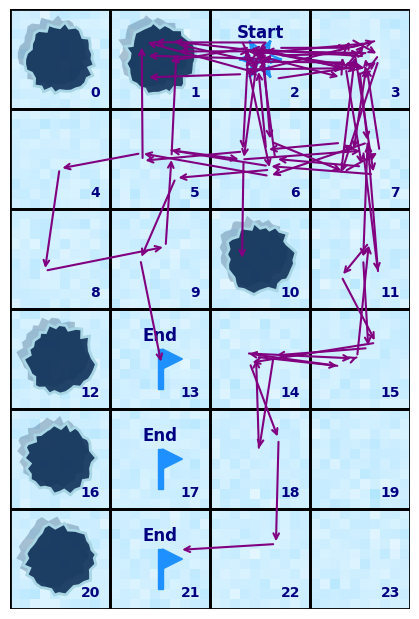

In [7]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import numpy as np
import time
import random
from types import SimpleNamespace
from colorama import Fore, Style
import re

class Constant:
    observation_header = "<|start_header_id|>observation<|end_header_id|>"
    action_header = "<|start_header_id|>action<|end_header_id|>"
    reward_header = "<|start_header_id|>reward<|end_header_id|>"
    edit_header = "<|start_header_id|>edit<|end_header_id|>"
    begin_of_episode = "<|begin_of_text|>"
    end_of_episode = "<|end_of_text|>"
    end_of_data = "<|eot_id|>"
    finetune = "<|finetune_right_pad_id|>"
    action_dict = {0: "left", 1: "down", 2: "right", 3: "up"}

def pretty_text(text):
    new_text = text
    new_text = new_text.replace(Constant.begin_of_episode,  Style.RESET_ALL + "")
    new_text = new_text.replace(Constant.action_header, Fore.YELLOW + "a:")
    new_text = new_text.replace(Constant.observation_header, Fore.BLUE + "o:")
    new_text = new_text.replace(Constant.reward_header, Fore.GREEN + "r:")
    new_text = new_text.replace(Constant.edit_header, Fore.RED + "")
    new_text = new_text.replace(Constant.end_of_data, "," + Style.RESET_ALL)
    new_text = new_text.replace(Constant.end_of_episode, "\n" + Style.RESET_ALL)
    new_text = new_text.replace(Constant.finetune, "" + Style.RESET_ALL)
    return new_text

def text_to_observation_trajectories(text):
    pattern_t = f"{re.escape(Constant.begin_of_episode)}{r'(.*?)'}{re.escape(Constant.end_of_episode)}"
    trajectories = re.findall(pattern_t, text)

    observation_trajectories = []
    for traj in trajectories:
        pattern = f"{re.escape(Constant.observation_header)}{r'(.*?)'}{re.escape(Constant.end_of_data)}"
        observations = re.findall(pattern, traj)
        observations = [int(obs) for obs in observations]
        observation_trajectories.append(observations)

    return observation_trajectories

def reset_to_text(observation):
    text = ""
    text += f"{Constant.begin_of_episode}"
    text += f"{Constant.observation_header}{observation}{Constant.end_of_data}"
    text += f"{Constant.action_header}"
    return text

def step_to_text(action, next_observation, reward, terminated, truncated):
    text = ""
    text += f"{Constant.action_dict[action]}{Constant.end_of_data}"
    text += f"{Constant.observation_header}{next_observation}{Constant.end_of_data}"
    if reward != 0.0:
        text += f"{Constant.reward_header}{round(reward, 2)}{Constant.end_of_data}"
    if truncated:
        text += f"{Constant.edit_header}...{Constant.end_of_data}"
    if terminated or truncated:
        text += f"{Constant.end_of_episode}"
    else:
        text += f"{Constant.action_header}"
    return text

def validate_action(action):
    rev_action_dict = {v: k for k, v in Constant.action_dict.items()}
    if action in rev_action_dict:
        return rev_action_dict[action]
    else:
        return None

class FrozenLake:
    def __init__(self, map=None, is_slippery=False, render=True):
        if map is None:
            map = generate_random_map(size=4, p=0.7, seed=None)
        env_kwargs = {
            "id": "FrozenLake-v1",
            "desc": map,
            "is_slippery": is_slippery,
            "render_mode": "rgb_array" if render else None,
        }
        self.render = render
        self.env = gym.make(**env_kwargs)
        self.done = True

    def __del__(self):
        self.env.close()

    def reset(self):
        observation, info = self.env.reset()
        if self.render:
            image = self.env.render()

        self.done = False

        return observation

    def step(self, action):
        if action is None:
            action = self.sample_action()

        next_observation, reward, terminated, truncated, info = self.env.step(action)
        if self.render:
            image = self.env.render()
        reward = float(reward)

        self.done = terminated or truncated

        return action, next_observation, reward, terminated, truncated

    def sample_action(self):
        action = self.env.action_space.sample()
        return action

    def action_space(self):
        return self.env.action_space

    def observation_space(self):
        return self.env.observation_space

    def is_done(self):
        return self.done

map = ['HHSF', 'FFFF', 'FFHF', 'HGFF', 'HGFF', 'HGFF']
print('')
game = FrozenLake(map=map, is_slippery=False, render=False)
text = ""
for i in range(100):
    if game.is_done():
        observation = game.reset()
        new_text = reset_to_text(observation)
        text += new_text
        print(pretty_text(new_text), end ="")
    action = game.sample_action()
    action, next_observation, reward, terminated, truncated = game.step(action)
    new_text = step_to_text(action, next_observation, reward, terminated, truncated)
    text += new_text
    print(pretty_text(new_text), end ="")
print(Style.RESET_ALL)
print("")
trajectories_observations = text_to_observation_trajectories(text)
draw_map(map, trajectories_observations)
print("")

In [8]:
from peft import PeftModel
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from huggingface_hub import HfApi
import os

base_model_name = "meta-llama/Llama-3.1-8B-Instruct"
adapter_name = "micahr234/FrozenLake-decidable-party"
adapter_subfolder = "checkpoint-950"

wandb.config.update({
    "base_model_name": base_model_name,
    "adapter_name": adapter_name,
    "adapter_subfolder": adapter_subfolder,
})

os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"
#os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

hf = HfApi()
hf.snapshot_download(
    repo_id=base_model_name,
    cache_dir="./model/",
    ignore_patterns="*/*"
)

tokenizer = AutoTokenizer.from_pretrained(
    base_model_name,
    cache_dir="./model/",
)
tokenizer.pad_token = '<|finetune_right_pad_id|>'
tokenizer.padding_side = 'right'
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_name,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    device_map="auto",
    cache_dir="./model/",
    attn_implementation="flash_attention_2",
)

model = PeftModel.from_pretrained(
    base_model,
    adapter_name,
    subfolder=adapter_subfolder + "/<default>",
    torch_dtype=torch.bfloat16,
    device_map="auto",
    attn_implementation="flash_attention_2",
)
model = model.merge_and_unload()

print(f"Memory footprint: {model.get_memory_footprint()/1024/1024/1024} GB")

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

USE_POLICY.md:   0%|          | 0.00/4.69k [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

(…)kpoint-950/<default>/adapter_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/3.17M [00:00<?, ?B/s]

Memory footprint: 14.95752739906311 GB


In [9]:
import torch
from torch.distributions import Categorical
import time
import random
from transformers import LogitsProcessor, LogitsProcessorList
from transformers.cache_utils import DynamicCache

class MyLogitsProcessor(LogitsProcessor):

    def __init__(self, tokens_to_keep):
        vocab = tokenizer.get_vocab()
        self.whitelist_ids = [v for k, v in vocab.items() if k in tokens_to_keep]

    def __call__(self, input_ids, scores):
        whitelist = torch.tensor(self.whitelist_ids, device=input_ids.device)
        mask = torch.ones_like(scores, device=input_ids.device, dtype=torch.bool)
        mask[:, whitelist] = False
        scores_processed = scores.masked_fill(mask, -float("inf"))
        return scores_processed

class Agent:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.logits_processor = MyLogitsProcessor(["up", "down", "right", "left"])
        self.past_key_values = DynamicCache()

    def gen_blacklist_ids(self, whitelist):
        vocab = tokenizer.get_vocab()
        blacklist_ids = [[v] for k, v in vocab.items() if k not in whitelist]
        return blacklist_ids

    def act(self, text, length):
        tokens = self.tokenizer(text, add_special_tokens=False, return_tensors='pt')
        input_len = tokens['input_ids'].shape[1]
        #stop_ids = tokenizer.eos_token_id
        stop_ids = []
        for k, v in tokens.items():
            tokens[k] = v.to(self.model.device)
        output = self.model.generate(
            **tokens,
            max_new_tokens = length,
            use_cache = True,
            bos_token_id=[],
            eos_token_id=stop_ids,
            pad_token_id=tokenizer.pad_token_id,
            do_sample=False,
            #temperature=temperature,
            #top_p=1.0,
            #top_k=0,
            #num_beams=1,
            return_dict_in_generate=True,
            output_scores=True,
            logits_processor=LogitsProcessorList([self.logits_processor]),
            past_key_values=self.past_key_values,
        )
        output_ids = output.sequences
        outputs_generate = self.tokenizer.batch_decode(output_ids[:, input_len:], skip_special_tokens=False)
        logits = output.scores
        entropys = []
        #for ls in logits:
        #    p = torch.softmax(ls * temperature, dim=-1)
        #    dist = Categorical(probs=p[0, :])
        #    entropys.append(dist.entropy())
        entropy = sum(entropys)
        return outputs_generate[0], entropy

    def imagine(self, text, length, temperature):
        tokens = self.tokenizer(text, add_special_tokens=False, return_tensors='pt')
        input_len = tokens['input_ids'].shape[1]
        stop_ids = []
        for k, v in tokens.items():
            tokens[k] = v.to(self.model.device)
        output = self.model.generate(
            **tokens,
            max_new_tokens = length,
            use_cache = True,
            bos_token_id=[],
            eos_token_id=stop_ids,
            pad_token_id=tokenizer.pad_token_id,
            do_sample=True,
            temperature=temperature,
            top_p=1.0,
            top_k=0,
            num_beams=1,
            return_dict_in_generate=True,
            output_scores=True,
        )
        output_ids = output.sequences
        outputs_generate = self.tokenizer.batch_decode(output_ids[:, input_len:], skip_special_tokens=False)
        return outputs_generate[0]

In [10]:
import random

class Game:
    def __init__(self, map, is_slippery, render, context):
        self.map = map
        self.is_slippery = is_slippery
        self.render = render
        self.env = FrozenLake(map=self.map, is_slippery=self.is_slippery, render=self.render)
        self.text = []
        self.cumulative_reward = []
        self.entropy = []
        self.observation = None
        self.text.extend(context)

    def step(self, agent, epsilon):
        if self.env.is_done():
            self.observation = self.env.reset()
            self.text.append("")
            new_text = reset_to_text(self.observation)
            self.text[-1] += new_text
            print(pretty_text(new_text), end ="")
            self.cumulative_reward.append(0.0)

        if epsilon > 0.0 and agent is not None and random.random() <= epsilon:
            action_text, entropy = agent.act("".join(self.text), length=1)
            self.entropy.append(entropy)
            action = validate_action(action_text)
        else:
            action = self.env.sample_action()
            self.entropy.append(None)

        real_action, self.observation, reward, terminated, truncated = self.env.step(action)
        new_text = step_to_text(real_action, self.observation, reward, terminated, truncated)
        self.text[-1] += new_text
        if action != real_action:
            print(f"---{action_text}---", end ="")
        print(pretty_text(new_text), end ="")
        self.cumulative_reward[-1] += reward

In [11]:
from itertools import accumulate

def draw_map_of_observations(name, map, text_temp):
    log = {}
    observation_trajectories = text_to_observation_trajectories("".join(text_temp))
    fig = draw_map(map, observation_trajectories, 0.8)
    img = wandb.Image(fig, mode="RGBA")
    log.update({f"{name}_figure": img})
    wandb.log(log)

def run_once(
        name="",
        map=generate_unique_map(),
        is_slippery=False,
        epsilon=[1.0],
        episodes=[1],
        context="",
        draw_map=[True],
    ):
    game = Game(
        map=map,
        is_slippery=is_slippery,
        render=False,
        context=context,
    )

    agent = Agent(model, tokenizer)

    iteration = 0
    episode = 0
    cumulative_episodes = list(accumulate(episodes))
    for es, ps, dm in zip(cumulative_episodes, epsilon, draw_map):

        start_length = len(game.text)

        while episode < es:
            game.step(agent, ps)

            log = {}
            log.update({f"step": iteration})
            log.update({f"episode": episode})
            log.update({f"{name}_epsilon": ps})

            if game.env.is_done():
                log.update({f"{name}_cumulative_reward": game.cumulative_reward[-1],})

            wandb.log(log)

            if game.env.is_done():
                episode += 1
            iteration += 1

        print(Style.RESET_ALL)
        print("")

        if dm:
            text_temp = game.text[start_length:]
            draw_map_of_observations(name, map, text_temp)

    return game.text

In [12]:
def run(name="", test_environments=1, episodes=None, draw_map=None, contexts=[], env_config={}, transformer_config={}):

    test_maps = []

    if "maps" in env_config:
        assert len(env_config["maps"]) == test_environments, "Number of maps must match number of test environments"
        test_maps.extend(env_config["maps"])
    else:
        for i in range(test_environments):
            map = generate_unique_map(other_maps=test_maps, **env_config["map_config"])
            test_maps.append(map)

    text = []
    for i in range(test_environments):
        if contexts:
            context = contexts[i]
        else:
            context = []
        t = run_once(
            name=f"{name}_test_{i}",
            map=test_maps[i],
            is_slippery=env_config["is_slippery"],
            episodes=episodes,
            context=context,
            draw_map=draw_map,
            **transformer_config,
        )
        text.append(t)

    return text

In [13]:
wandb.run.log_code(".", name=name, include_fn=lambda path: path.endswith(".ipynb"))

wandb: WARNING No relevant files were detected in the specified directory. No code will be logged to your run.


In [14]:
settings = {
    "is_slippery": False,
}

wandb.config.update(settings)

In [15]:
# In distribution testing

map_config = {
    "min_width": 3,
    "max_width": 5,
    "min_height": 3,
    "max_height": 5,
    "hole_prob": 0.2,
    "start_pos": None,
    "start_pos_prob": 0.1,
    "goal_pos": None,
    "goal_pos_prob": 0.1,
    "min_hops": 4,
}

env_config = {
    "is_slippery": settings["is_slippery"],
    "render": False,
    "map_config": map_config,
}

transformer_config = {
    "epsilon": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

config = {
    "name": "in_distro",
    "test_environments": 50,
    "env_config": env_config,
    "transformer_config": transformer_config,
    "episodes": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10],
    "draw_map": [False, False, False, False, False, False, False, False, False, False, True],
}

wandb.config.update(config)
in_dist_contexts = run(**config)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# Testing in non-stationary game

map_config = {
    "min_width": 3,
    "max_width": 5,
    "min_height": 3,
    "max_height": 5,
    "hole_prob": 0.2,
    "start_pos": None,
    "start_pos_prob": 0.1,
    "goal_pos": None,
    "goal_pos_prob": 0.1,
    "min_hops": 4,
}

env_config = {
    "is_slippery": settings["is_slippery"],
    "render": False,
    "map_config": map_config,
}

transformer_config = {
    "epsilon": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

config = {
    "name": "non-stationary",
    "test_environments": 50,
    "env_config": env_config,
    "transformer_config": transformer_config,
    "episodes": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10],
    "contexts": in_dist_contexts,
    "draw_map": [False, False, False, False, False, False, False, False, False, False, True],
}

contexts = run(**config)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Out of distribution testing

map_config = {
    "min_width": 6,
    "max_width": 7,
    "min_height": 6,
    "max_height": 7,
    "hole_prob": 0.2,
    "start_pos": None,
    "start_pos_prob": 0.1,
    "goal_pos": None,
    "goal_pos_prob": 0.1,
    "min_hops": 4,
}

env_config = {
    "is_slippery": settings["is_slippery"],
    "render": False,
    "map_config": map_config,
}

transformer_config = {
    "epsilon": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

config = {
    "name": "out_distro",
    "test_environments": 50,
    "env_config": env_config,
    "transformer_config": transformer_config,
    "episodes": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10],
    "draw_map": [False, False, False, False, False, False, False, False, False, False, True],
}

#wandb.config.update(config)
out_dist_contexts = run(**config)

Output hidden; open in https://colab.research.google.com to view.

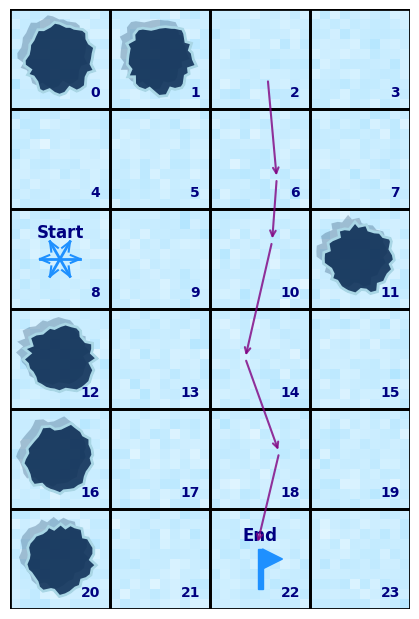

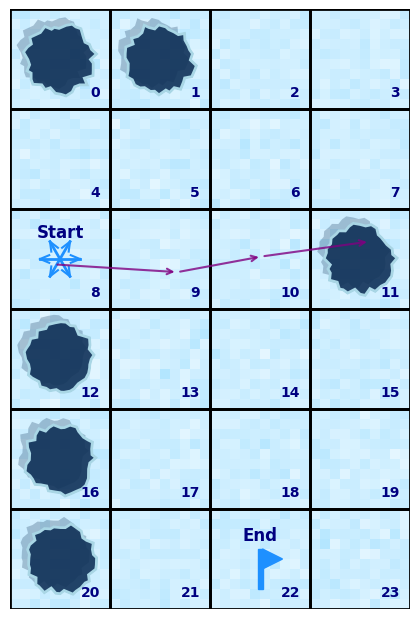

o:8,a:down,o:12,




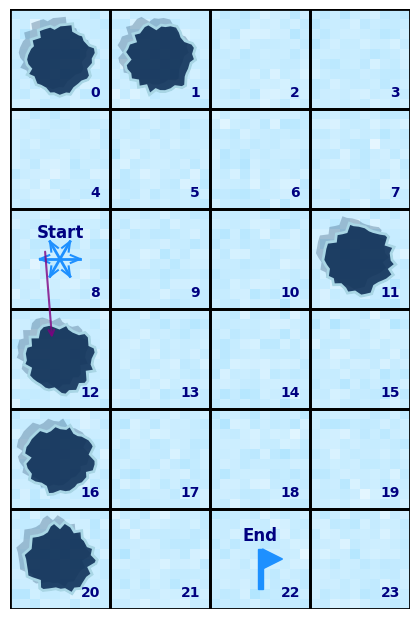

o:8,a:left,o:8,a:right,o:9,a:down,o:13,a:down,o:17,a:down,o:21,a:down,o:21,a:right,o:22,r:1.0,




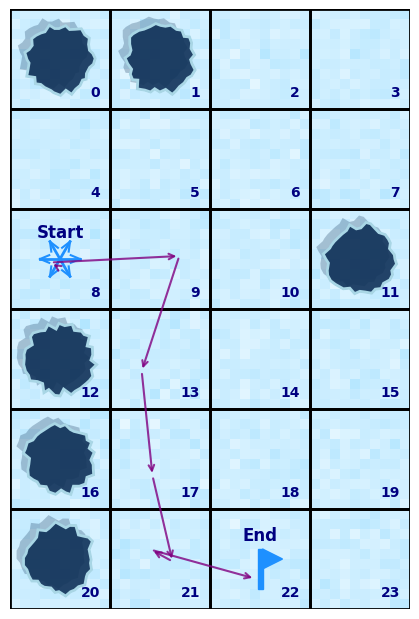

o:8,a:right,o:9,a:down,o:13,a:down,o:17,a:down,o:21,a:right,o:22,r:1.0,




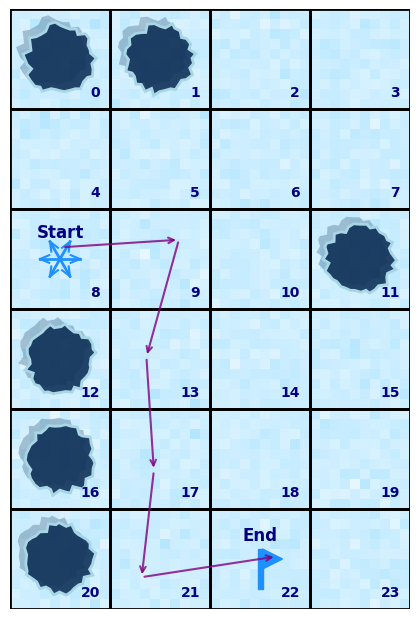

o:8,a:right,o:9,a:down,o:13,a:down,o:17,a:down,o:21,a:right,o:22,r:1.0,




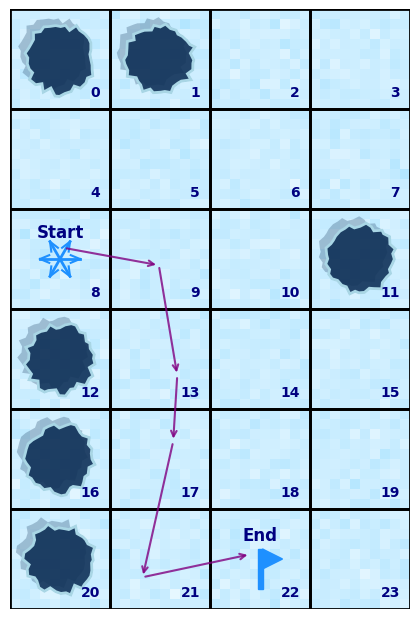

o:8,a:right,o:9,a:down,o:13,a:down,o:17,a:down,o:21,a:right,o:22,r:1.0,




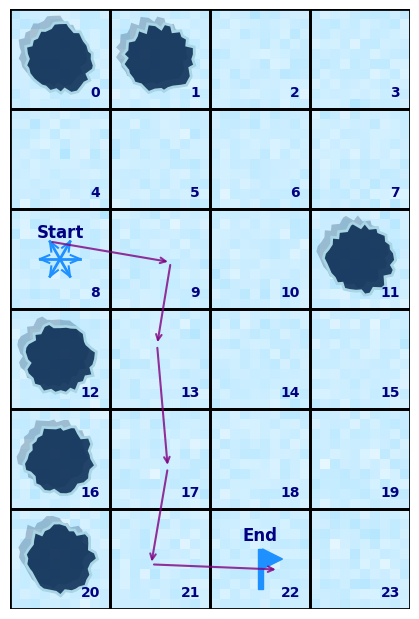

In [18]:
# Testing if network can chain

map = ['HHFF', 'FFFF', 'SFFH', 'HFFF', 'HFFF', 'HFGF']

game = FrozenLake(map=map, is_slippery=False, render=False)

context_1 = "<|begin_of_text|><|start_header_id|>observation<|end_header_id|>2<|eot_id|><|start_header_id|>action<|end_header_id|>down<|eot_id|><|start_header_id|>observation<|end_header_id|>6<|eot_id|><|start_header_id|>action<|end_header_id|>down<|eot_id|><|start_header_id|>observation<|end_header_id|>10<|eot_id|><|start_header_id|>action<|end_header_id|>down<|eot_id|><|start_header_id|>observation<|end_header_id|>14<|eot_id|><|start_header_id|>action<|end_header_id|>down<|eot_id|><|start_header_id|>observation<|end_header_id|>18<|eot_id|><|start_header_id|>action<|end_header_id|>down<|eot_id|><|start_header_id|>observation<|end_header_id|>22<|eot_id|><|start_header_id|>reward<|end_header_id|>1.0<|eot_id|><|end_of_text|>"
draw_map_of_observations("chaining_example_1", map, context_1)

context_2 = "<|begin_of_text|><|start_header_id|>observation<|end_header_id|>8<|eot_id|><|start_header_id|>action<|end_header_id|>right<|eot_id|><|start_header_id|>observation<|end_header_id|>9<|eot_id|><|start_header_id|>action<|end_header_id|>right<|eot_id|><|start_header_id|>observation<|end_header_id|>10<|eot_id|><|start_header_id|>action<|end_header_id|>right<|eot_id|><|start_header_id|>observation<|end_header_id|>11<|eot_id|><|end_of_text|>"
draw_map_of_observations("chaining_example_1", map, context_2)

contexts = run_once(
        name="chaining",
        map=map,
        is_slippery=settings["is_slippery"],
        epsilon=[1.0, 1.0, 1.0, 1.0, 1.0],
        episodes=[1, 1, 1, 1, 1],
        context=[context_1, context_2],
        draw_map=[True, True, True, True, True],
)

In [ ]:
wandb.finish()

In [ ]:
from google.colab import runtime
runtime.unassign()